# Деревья решений.

## Цели работы

1. **Импорт библиотек и загрузка датасета:**
   - Импортировать все необходимые библиотеки и загрузить датасет, который будет использоваться для обучения и тестирования модели дерева решений.

2. **Обучение модели дерева решений:**
   - Обучить базовую модель дерева решений без настройки гиперпараметров и оценить её начальное качество на тестовых данных.

3. **Визуализация дерева решений:**
   - С использованием библиотеки graphviz визуализировать структуру обученного дерева решений для лучшего понимания его работы.

4. **Настройка гиперпараметров:**
   - Настроить гиперпараметры модели дерева решений, такие как максимальная глубина (`max_depth`) и количество признаков (`max_features`), чтобы улучшить точность модели.

5. **Оценка влияния гиперпараметров:**
   - Оценить, как изменение гиперпараметров влияет на сложность модели и её способность к обобщению на новых данных.

6. **Применение кросс-валидации:**
   - Использовать метод кросс-валидации для более надёжной оценки качества модели и избежать переобучения.

7. **Поиск оптимальных гиперпараметров с GridSearchCV:**
   - Применить GridSearchCV для автоматизации процесса подбора оптимальных гиперпараметров модели.

8. **Финальное тестирование модели:**
   - Обучить модель с лучшими гиперпараметрами и провести финальное тестирование на тестовой выборке для получения окончательной оценки точности.

Цели документа направлены на всестороннее изучение и применение деревьев решений, от обучения и визуализации до оптимизации и валидации, с целью построения эффективной модели классификации.

## Этап 1. Загрузка датасета и импорт библиотек

In [1]:
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
wine_dataset = load_wine()
wine_dataframe = pd.DataFrame(wine_dataset['data'], columns=wine_dataset.feature_names)

X = wine_dataframe
y = wine_dataset['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=17)

dtc = DecisionTreeClassifier(random_state=17)
dtc_model = dtc.fit(x_train, y_train)

## Этап 2. Отображения дерева с помощью библиотеки graphviz.

In [3]:
from sklearn import tree
import graphviz

In [4]:
def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=wine_dataset.feature_names,
                                    class_names=wine_dataset.target_names,
                                    filled=True)
    return graphviz.Source(dot_data)

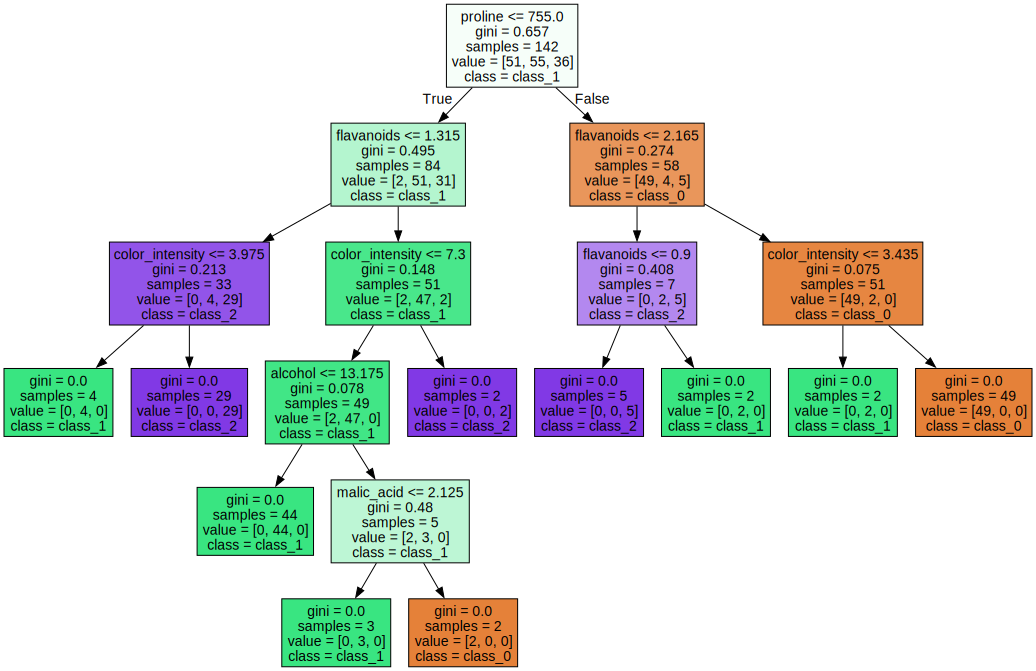

In [5]:
print_graph(dtc_model)

## Этап 3. Прогноз тестовой выборки данных

In [6]:
tc_predictions = dtc.predict(x_test)
tc_predictions

array([1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1])

In [7]:
accuracy = dtc.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9722222222222222


Теперь попробуем сделать начальную настройку гиперпараметров и посмотреть, что из этого выйдет. 

## Этап 4. Построение модели и её прогноз

In [8]:
dtc = DecisionTreeClassifier(max_features=2, random_state=17)
dtc_model2 = dtc.fit(x_train, y_train)

tc_predictions = dtc.predict(x_test)
tc_predictions

array([1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1])

In [9]:
accuracy = dtc.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9444444444444444


## Этап 5. Граф дерева решений

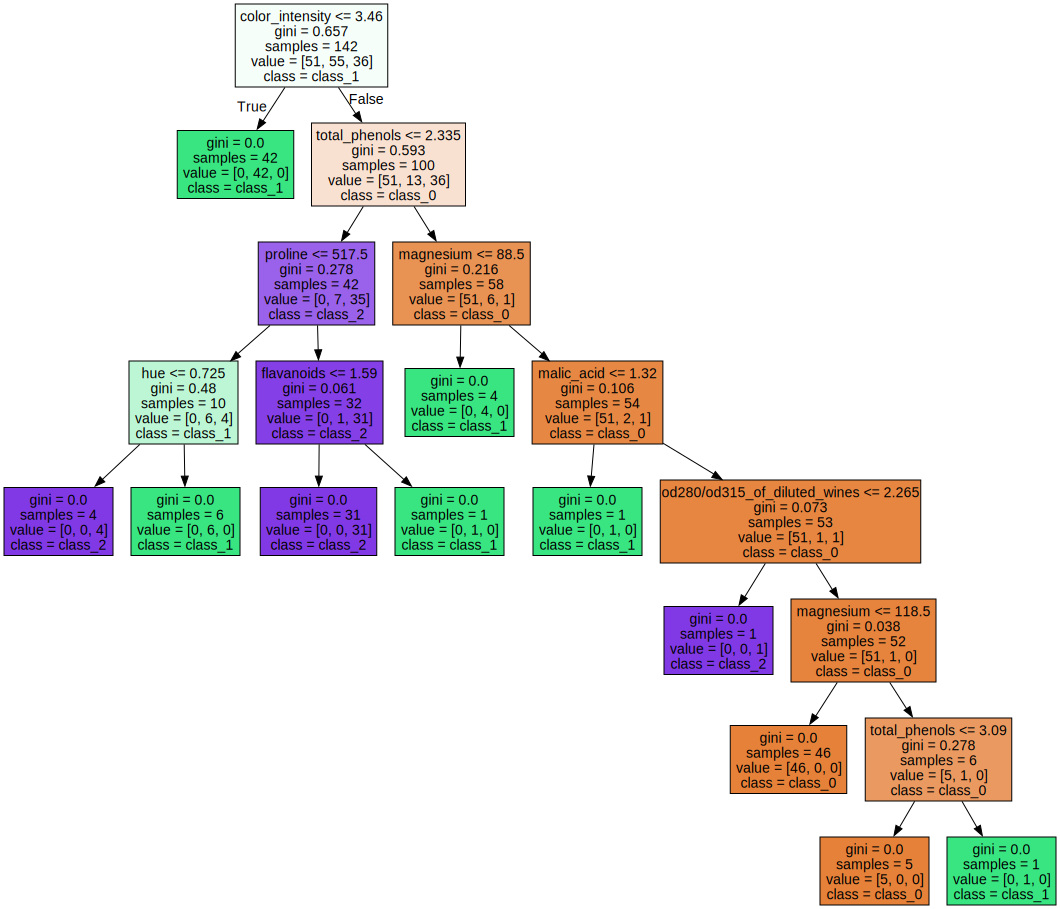

In [10]:
print_graph(dtc_model2)

Модель работает точнее, чем без настройки гиперпараметров, но по графу можно увидеть, что глубина дерева увеличилась, при этом в нескольких листах присутствует только по одному объекту, из-за чего на тестовом наборе данных дерево могло несколько потерять обобщающую способность.

Так как главная задача модели - способность обобщаться на новые данные, то для подбора оптимальных гиперпараметров надо пожертвовать небольшой порцией данных, чтобы на ней во время обучения проверять качество модели.

Часто для этого используют кросс-валидацию: модель обучается K раз на (K-1) подвыборках исходной выборки, а на одной подвыборке проверяется (каждый раз на разной). Получаются K оценок качества модели, которые обычно усредняются, давая среднюю оценку.

Кросс-валидация применяется для подбора гиперпараметров модели в методе GridSearchCV(): для каждой уникальной совокупности значений параметров проводится кросс-валидация и выбирается лучшее сочетание параметров.

## Этап 6. Настройка параметров max_depth и max_features

In [11]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [12]:
tree_params = {'max_depth': range(1, 6),
               'max_features': range(1, 10)}

tree_grid = GridSearchCV(dtc, tree_params, cv=5)

## Этап 7. Построение модели и вывод лучшего сочетания параметров

In [13]:
tree_grid.fit(x_train, y_train)
print(f'Best params: {tree_grid.best_params_}')

Best params: {'max_depth': 5, 'max_features': 2}


## Этап 8. Прогноз для тестовой выборки данных

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
predicted = tree_grid.predict(x_test)
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9444444444444444
